In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
### Load data
df_train = pd.read_csv("./data/Train.csv")

### Target particle concentration
- df_train.target
- Single particles > 2.5 micro-meters

In [ ]:
### Which pollutors are beeing described. They all seem to start with L3_
L3_list = []
for col in df_train.columns:
    if "L3_" in col:
        L3_list.append(col)

print (L3_list)

In [ ]:
measure_objects = []
for col in L3_list:
    cl = col.split("_")
    measure_objects.append(cl[1])

set(measure_objects)

- AER, CLOUD, CH4- Gunnar
- CO, HCO, NO2 - Clara
- O3, SO2 - Isabelle

In [ ]:
def get_measure_object_cols(object, df):
    obj_list = [col for col in df.columns if object in col]
    return obj_list

In [ ]:
get_measure_object_cols("AER", df_train)

### AER - Aerosols

https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_AER_AI

|   Column	|   Meaning	|    Keep?   |   
|---	|---	|---    |
|   'L3_AER_AI_absorbing_aerosol_index'	|   Index of Aerosol prevalence - Unit-less	|    Keep   |
|   'L3_AER_AI_sensor_altitude'	|    Satellite Altitude in meters	|    Remove   |
|   'L3_AER_AI_sensor_azimuth_angle'	|   Satellite Angles    | Remove    |
|   'L3_AER_AI_sensor_zenith_angle'	|   Satellite Angles    | Remove    |
|   'L3_AER_AI_solar_azimuth_angle'|   Satellite Angles    | Remove    |
|   'L3_AER_AI_solar_zenith_angle'|   Satellite Angles    | Remove    |


In [ ]:
get_measure_object_cols("CLOUD", df_train)

|   Column	|   Meaning	|   Keep	|
|---	|---	|---	|
|  'L3_CLOUD_cloud_base_height', 	|   m above SL - Altitude of lowest point of the cloud - m above Sea Level	|   Keep	|
|   L3_CLOUD_cloud_base_pressure	|   Pa - Pressure Level - Altitude of lowest point of the cloud	|   Keep	|
|   L3_CLOUD_cloud_fraction	|   Ratio 0 - 1 - portion of earths surface covered by clouds	|   Keep	|
|   L3_CLOUD_cloud_optical_depth	|   m - Height from base to top	|   Keep	|
|   L3_CLOUD_cloud_top_height	|   m above Sea level - Height of cloud above Sea level	|   Keep	|
|   L3_CLOUD_cloud_top_pressure	|   Pa - Pressure Level - Altitude of highest point of the cloud	|   Keep	|
|   L3_CLOUD_sensor_azimuth_angle', 'L3_CLOUD_sensor_zenith_angle', 'L3_CLOUD_solar_azimuth_angle', 'L3_CLOUD_solar_zenith_angle',	|   Satellite Angles	|  Remove	|
|   L3_CLOUD_surface_albedo	|   Ratio - Ratio of reflected Sunlight	|   Remove	|


In [ ]:
get_measure_object_cols("CH4", df_train)

### CH4

https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_CH4

|   Column	|   Meaning	|   Keep	|
|---	|---	|---	|
|  'L3_CH4_CH4_column_volume_mixing_ratio_dry_air' 	|   parts per Billion - mol/mol - Concentration in an Air column	|   Keep	|
|   L3_CH4_aerosol_height	|   m - In Which Height was CH4 Aerosol measured?	|   Keep	|
|   L3_CH4_aerosol_optical_depth	|   Unitless - aerosol optical thickness in the SWIR band - Similar to concentration?	|   Keep	|
|   'L3_CH4_sensor_azimuth_angle',
 'L3_CH4_sensor_zenith_angle',
 'L3_CH4_solar_azimuth_angle',
 'L3_CH4_solar_zenith_angle'	|   Satellite Angles	|  Remove	|


In [ ]:
### List to remove Satellite angle Columns
sat_angle_cols = get_measure_object_cols("_angle", df_train)
len (sat_angle_cols)

In [ ]:
get_measure_object_cols("SO2", df_train)

In [ ]:
df_train.columns[0:13]

In [77]:
### List of weather and satellite measurement_columns to keep
meas_cols = list(df_train.columns[0:14]) + ['L3_AER_AI_absorbing_aerosol_index', # AER
                # CLOUD
                'L3_CLOUD_cloud_base_height',
                'L3_CLOUD_cloud_base_pressure',
                'L3_CLOUD_cloud_fraction',
                'L3_CLOUD_cloud_optical_depth',
                'L3_CLOUD_cloud_top_height',
                'L3_CLOUD_cloud_top_pressure',
                ## CH4
                'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
                'L3_CH4_aerosol_height',
                'L3_CH4_aerosol_optical_depth',
                ## NO2
                'L3_NO2_NO2_column_number_density',
                'L3_NO2_absorbing_aerosol_index',
                'L3_NO2_cloud_fraction',
                'L3_NO2_tropospheric_NO2_column_number_density',
                'L3_NO2_tropopause_pressure',
                ## CO
                'L3_CO_CO_column_number_density',
                'L3_CO_H2O_column_number_density',
                'L3_CO_cloud_height',
                ## HCHO
                'L3_HCHO_tropospheric_HCHO_column_number_density',
                'L3_HCHO_cloud_fraction',
                ## O3
                'L3_O3_O3_column_number_density',
                'L3_O3_O3_effective_temperature',
                ## SO2
                'L3_SO2_SO2_column_number_density',
                'L3_SO2_absorbing_aerosol_index',
                'L3_SO2_cloud_fraction'
                ]

df_train[meas_cols]
df_2= df_train[meas_cols]
df_2.shape

(30557, 39)

### Preprocessing and EDA
- Dates to Datetime
- Preprocessing steps to pipeline/function
- Remove unnessecary columns

- Detect Missing Values
- Detect non-meaningful values
- Detect Patterns and Correlations
    - Within Satellite Data
    - Within Weather Data
    - Between Satellite and Weather Data
    - Between Target Value and Satellite / Weather Data

- Location of the Cities

In [78]:
### Define sets of columns
weather_station_cols = list(df_train.columns[8:14])
target_cols = get_measure_object_cols("target", df_2)
sat_cols = get_measure_object_cols("L3", df_2)
my_sat_cols = get_measure_object_cols("AER", df_2) + get_measure_object_cols("CLOUD", df_2) + get_measure_object_cols("CH4", df_2)

In [79]:
weather_station_cols
target_cols
sat_cols

['L3_AER_AI_absorbing_aerosol_index',
 'L3_CLOUD_cloud_base_height',
 'L3_CLOUD_cloud_base_pressure',
 'L3_CLOUD_cloud_fraction',
 'L3_CLOUD_cloud_optical_depth',
 'L3_CLOUD_cloud_top_height',
 'L3_CLOUD_cloud_top_pressure',
 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
 'L3_CH4_aerosol_height',
 'L3_CH4_aerosol_optical_depth',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_SO2_SO2_column_number_density',
 'L3_SO2_absorbing_aerosol_index',
 'L3_SO2_cloud_fraction']

In [ ]:
### Inspect the date and places and target
df_2[target_cols].info() # No Zero Values
df_2[target_cols].describe() # target_max 999 might be false

In [ ]:
### Plot histograms for target min, max

sns.set_theme(style="darkgrid")

sns.displot(df_2, x = "target", binwidth = 20) # Left skewed, Minimum zero

In [ ]:
sns.displot(df_2, x = "target_min", binwidth = 20) # Much stronger skewed to the left

In [ ]:
sns.displot(df_2, x = "target_max", binwidth = 20) # Potential Outliers at 999

sum (df_2.target_max == 999) # 42 entries

In [80]:
df_2.loc[df_2.target_max == 999, target_cols] # No pattern to see here

target  target_min  target_max  target_variance  target_count
8172    174.0        28.0       999.0        324960.00            72
8173    689.0       308.0       999.0        348065.00            72
10298   261.0       164.0       999.0        697848.00           120
13604    91.0         9.0       999.0        448444.00            45
13605    85.0        17.0       999.0        299386.00            87
13608    70.0        17.0       999.0        127485.00            72
13610    57.0         9.0       999.0        556585.00            95
13611    46.0         5.0       999.0       1075490.00           103
13612    65.0        13.0       999.0        950330.00           100
13613    46.0         9.0       999.0        120354.00            87
13615    80.0         5.0       999.0        270902.00            92
13616    87.0        42.0       999.0        310205.00           100
13617    50.0         5.0       999.0        548679.00            84
13624    55.0         9.0       999.0        232430.00            82
13632    68.0         5.0       999.0        854078.00           101
13635    85.0        13.0       999.0        243609.00            93
13645    97.0         5.0       999.0        149273.00            85
13880   257.0       154.0       999.0        213867.00            96
14814    48.0         5.0       999.0        400794.00            63
14851    38.0         5.0       999.0        157258.00            60
18299   127.0        66.0       999.0        244961.00            70
18347    39.0         3.0       999.0        141541.00            67
18348    41.0        14.0       999.0        560255.00            70
19402    30.0         5.0       999.0        883405.00           191
19403    42.0        13.0       999.0        839973.00           194
19404    42.0         5.0       999.0        574223.00           202
19405    38.0         9.0       999.0         51352.50           198
20682   167.0       150.0       999.0         53688.20           216
20691   198.0         4.0       999.0         94165.10           201
20701   168.0        17.0       999.0        154788.00           205
20702   158.0         4.0       999.0         83187.20           207
20754   152.0        74.0       999.0         88428.60           259
21344    55.0        13.0       999.0        147738.00           154
21376    70.0        17.0       999.0        177873.00           127
26307    14.0         3.0       999.0        160008.00            68
26308    19.0         8.0       999.0       1060740.00            17
27255   172.0        97.0       999.0        186402.00            67
27256   181.0       151.0       999.0       1517540.00            72
27262   169.0       136.0       999.0        838845.00            72
27263   159.0        81.0       999.0       1156110.00            72
27322    57.0        16.0       999.0        941855.69            72
27323    72.0        17.0       999.0       1338736.12            68

In [ ]:
### Place and Date
df_2.Date # in Object format. 
pd.to_datetime(df_2.Date)

# 

In [81]:
### All columns of interest for my eda
cols = ["Date", "Place_ID", "target"] + weather_station_cols + my_sat_cols

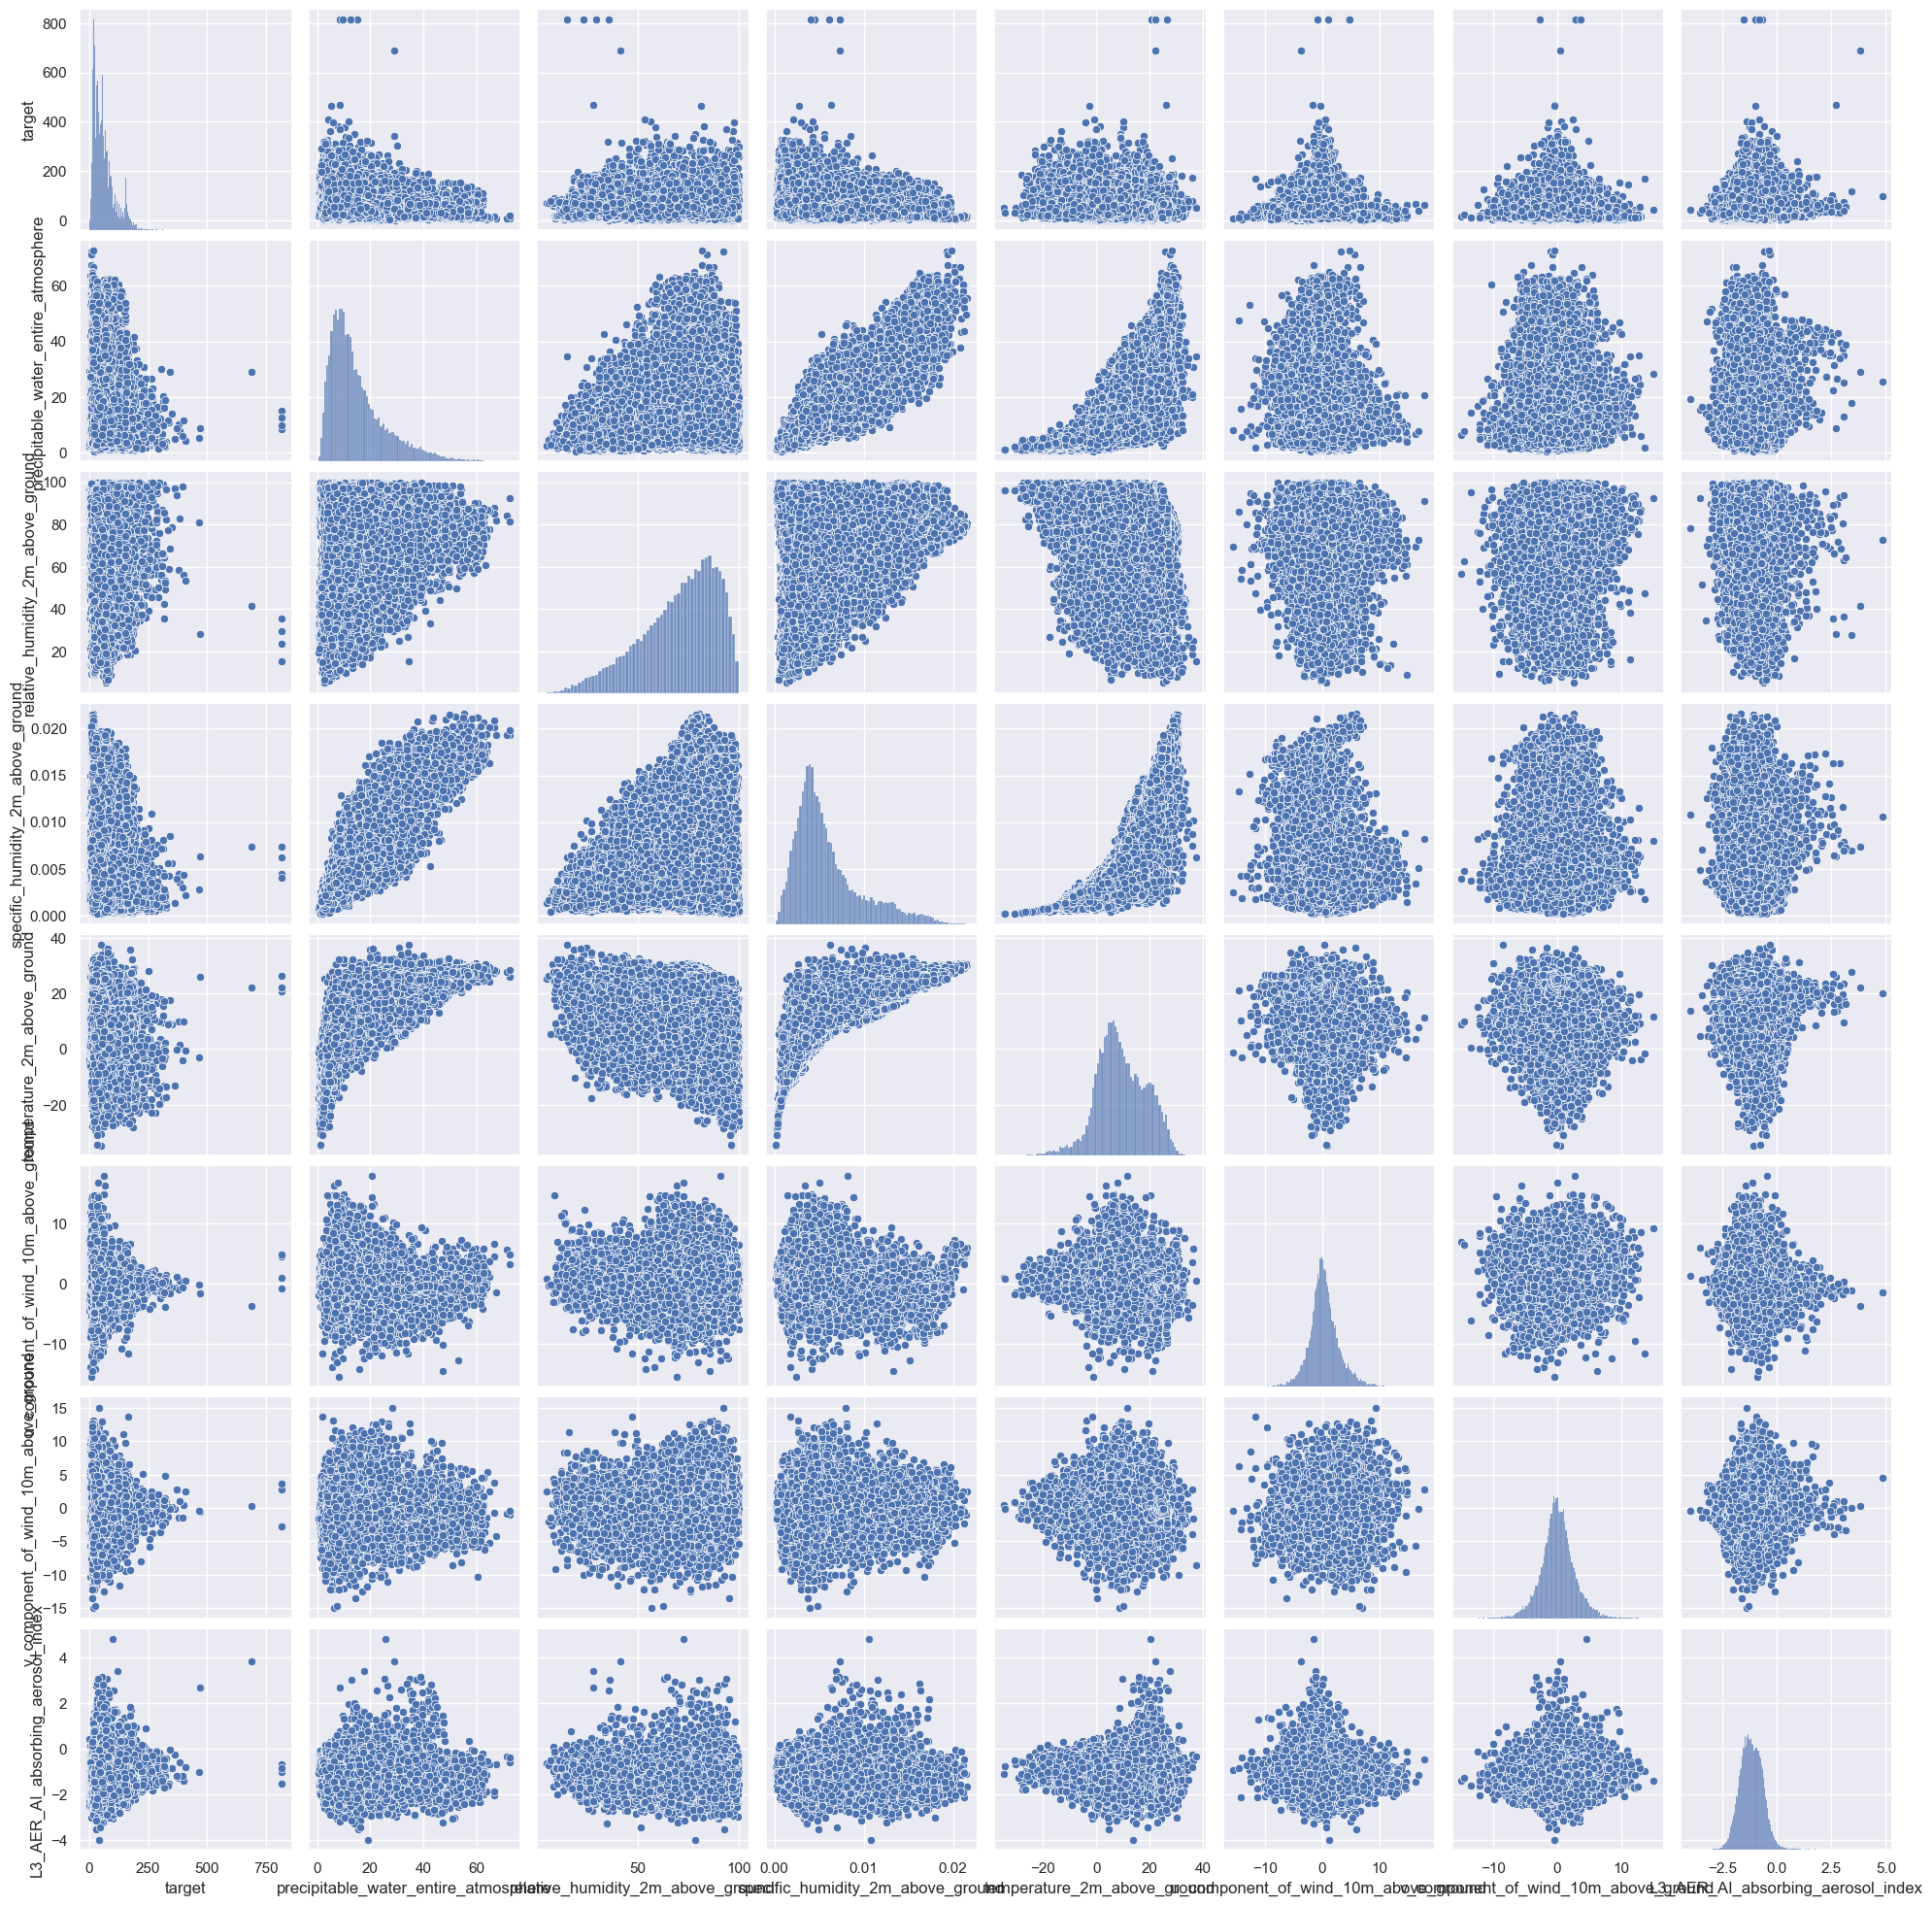

In [82]:
### Aerosol and Weather and Target
sns.pairplot(df_2[cols[2:10]])

### Target and prec/humidity
- Outliers above 600?

- Relationship to humidity and precipitable water
- Higher Values with lower precipitable-water, specific humidity and higher relative humidity

- but prec and specific are left skewed and relative humidity is right skewed
- precipitable water is positively correlated with specific humidty

- relative humidity: percentage of maximum absolute humidity at this temperature
- specific humidity: ratio of water vapor / total air   - mass for a given volume

In [ ]:
sns.pairplot(df_2[cols[2:6]])

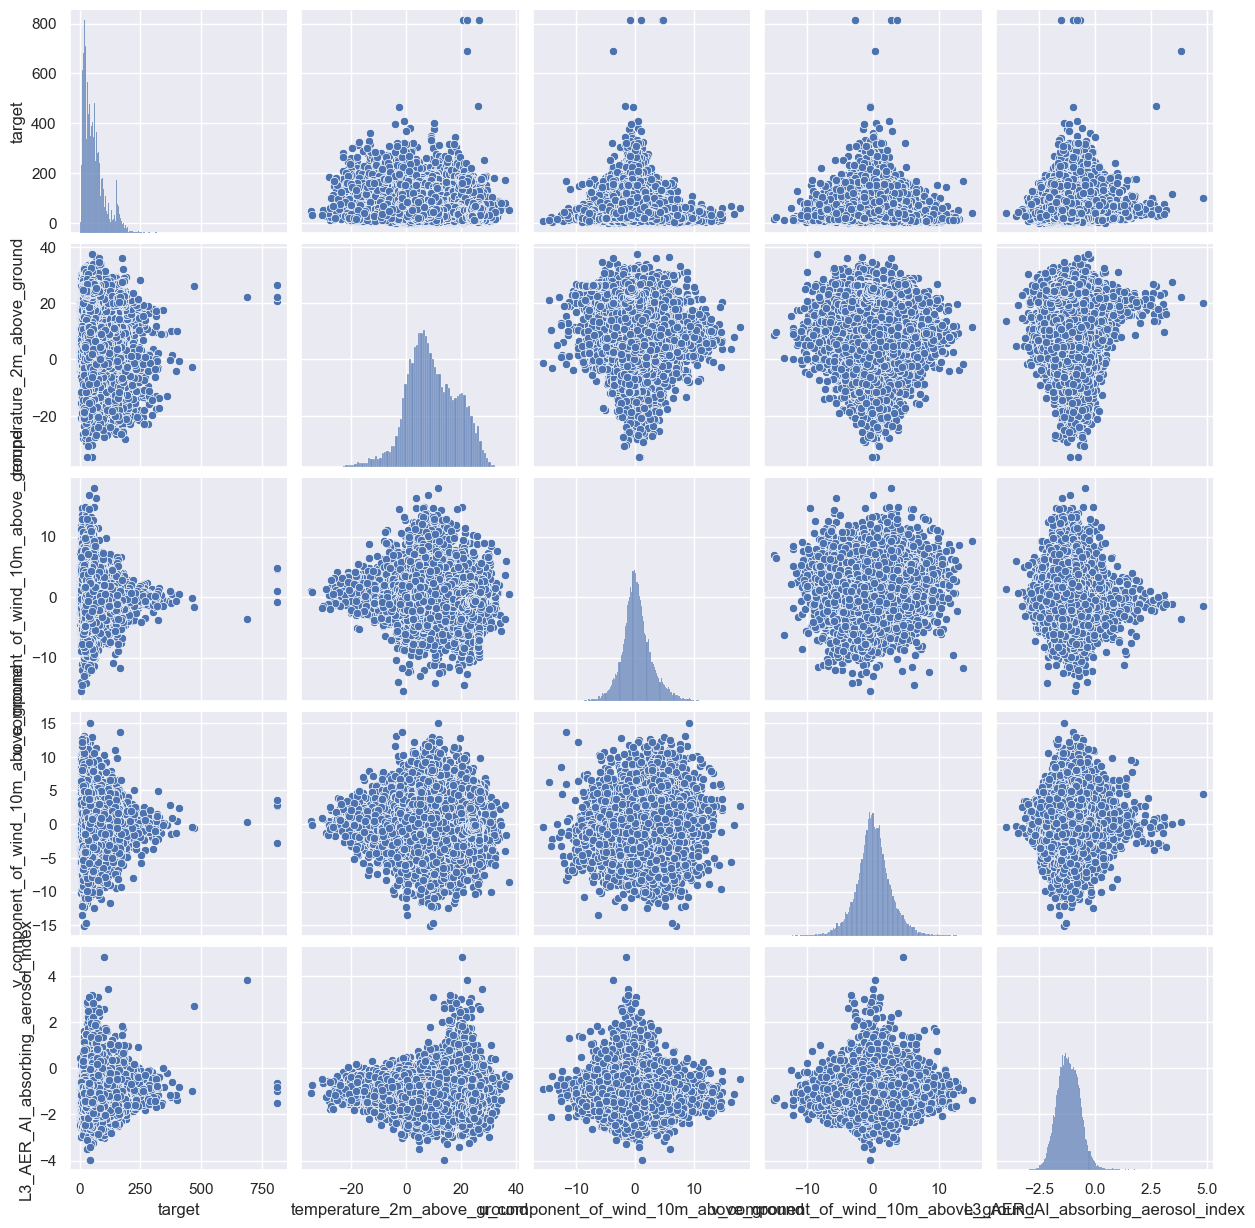

In [83]:
### Target and AERosols and wind
sns.pairplot(df_2[["target","temperature_2m_above_ground", "u_component_of_wind_10m_above_ground", "v_component_of_wind_10m_above_ground", "L3_AER_AI_absorbing_aerosol_index"]])


### Wind, temperature, Aerosol
- Aerosol and Wind is normally distributed
- The highest target values correspond with the distribution of wind and aerosol
    - highest target values in the mean range of aerosol and wind

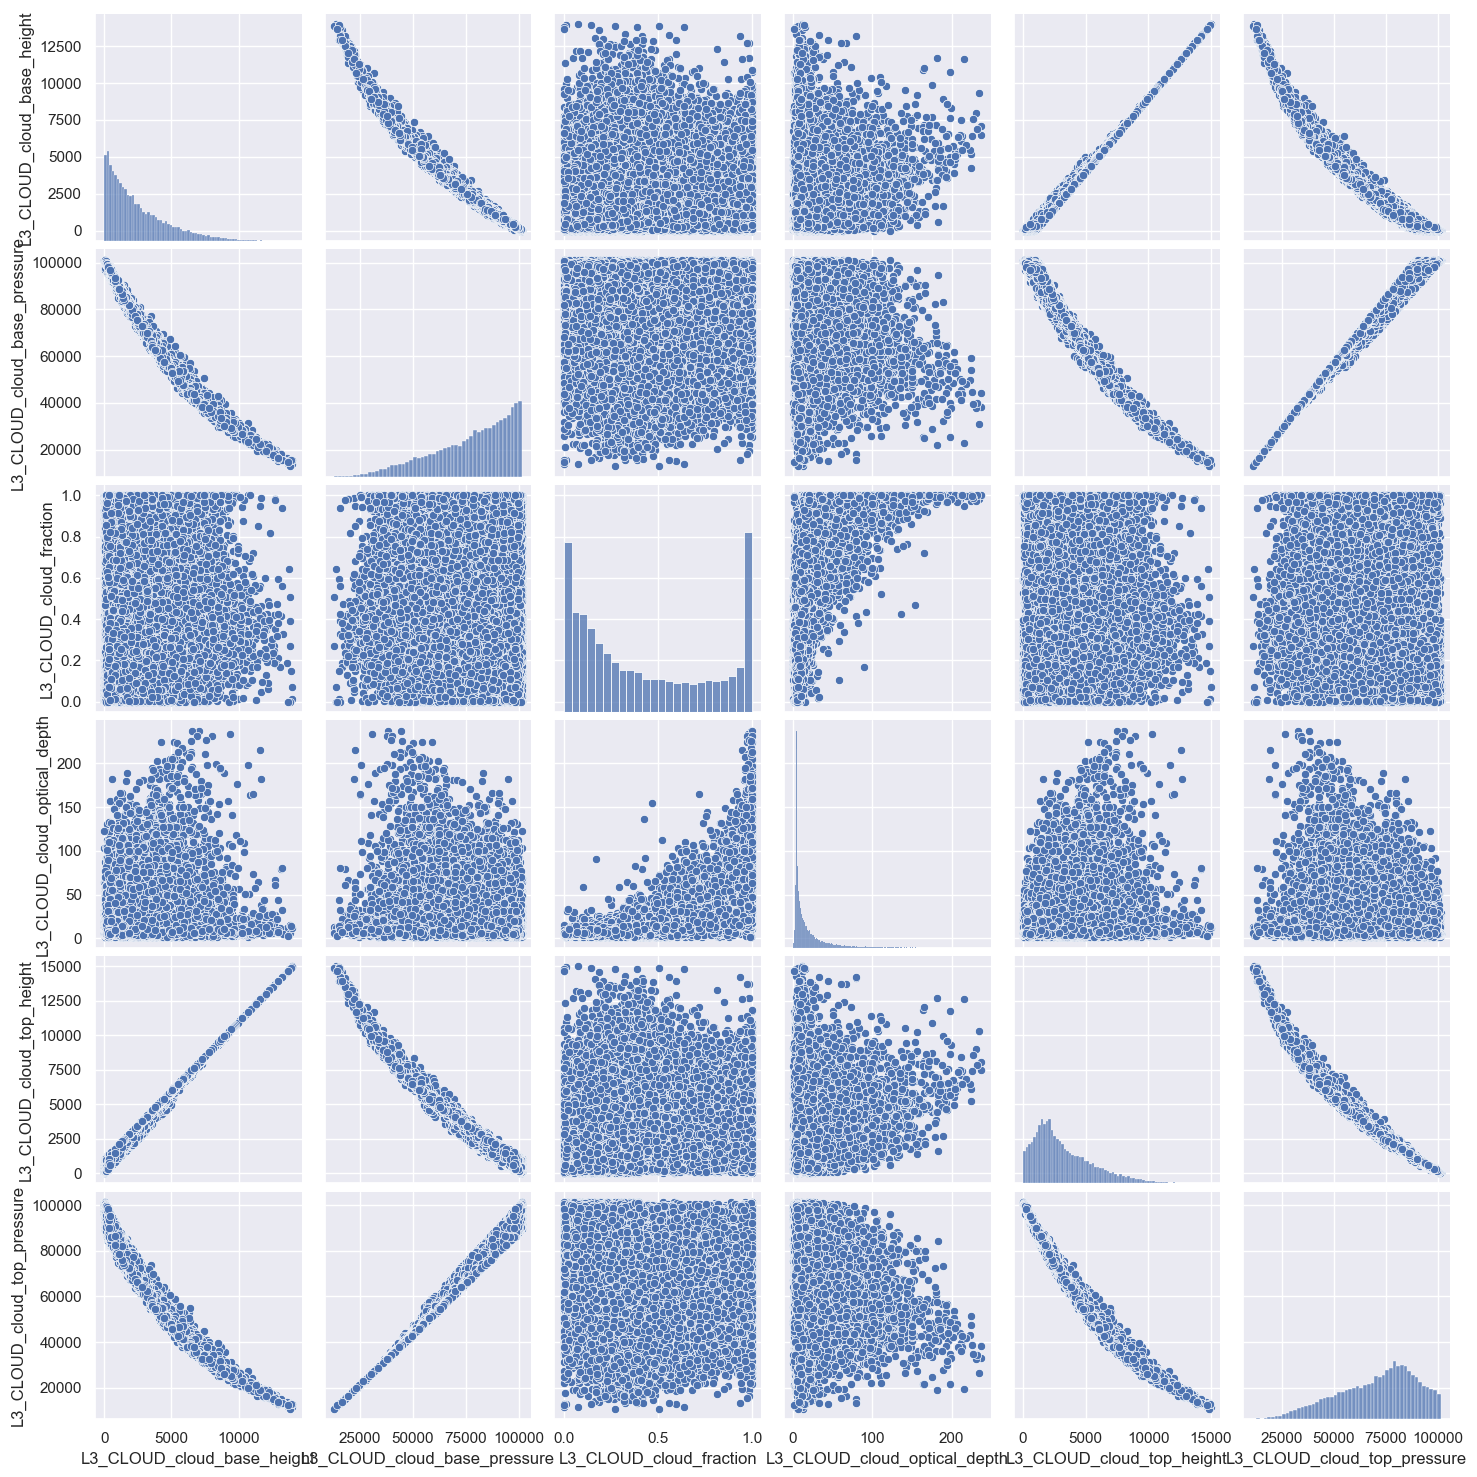

In [71]:
### Just Clouds
sns.pairplot(df_2[get_measure_object_cols("CLOUD", df_2)])

### Clouds
- base_height correlates linearly almost without error with top height
    - remove top height
- base_height correlates almost linearly without errors with cloud top pressure and base pressure
    - remove top pressure
    - remove base-pressure

- Remaining cloud columns: 
    - 'L3_CLOUD_cloud_fraction'
    - 'L3_CLOUD_cloud_optical_depth'
    - 'L3_CLOUD_cloud_base_height'

In [84]:
cloud_cols = ["L3_CLOUD_cloud_fraction", "L3_CLOUD_cloud_optical_depth", "L3_CLOUD_cloud_base_height"]

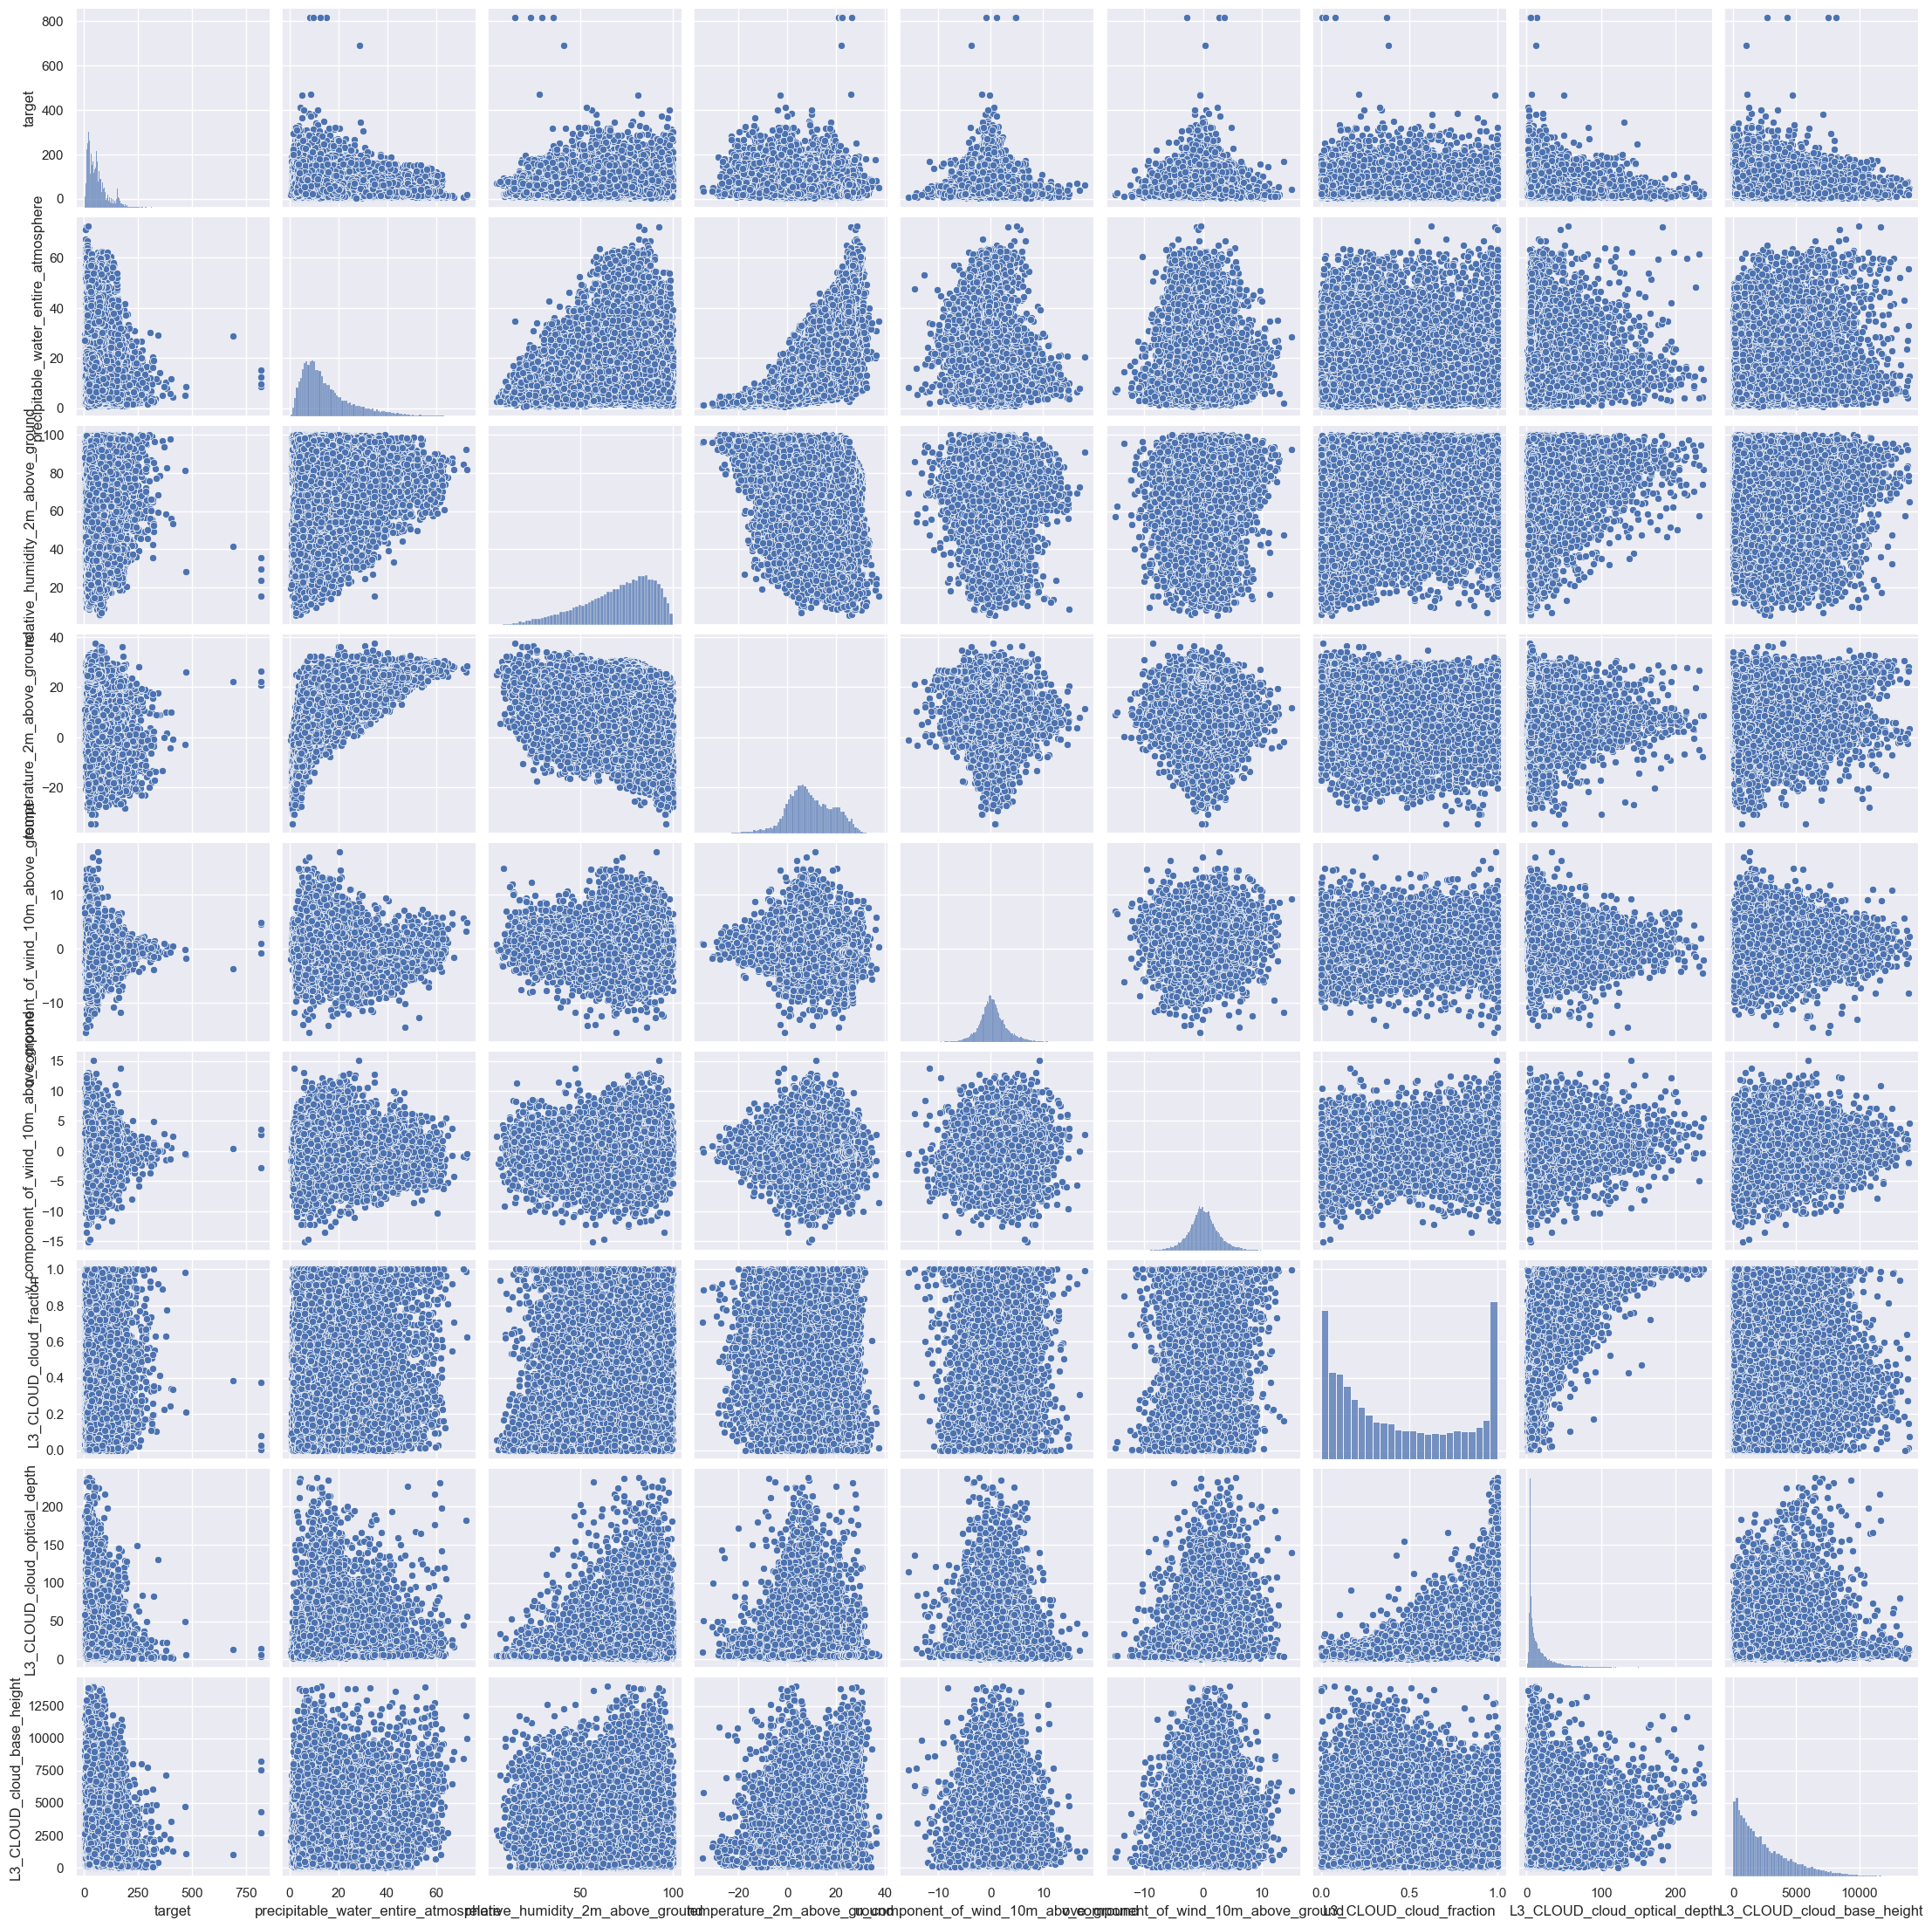

In [88]:
### Clouds and weather
cols2 = ["target", "precipitable_water_entire_atmosphere", "relative_humidity_2m_above_ground", "specific_humidity_2m_above_ground", "temperature_2m_above_ground",
 "u_component_of_wind_10m_above_ground", "v_component_of_wind_10m_above_ground"] + cloud_cols

sns.pairplot(df_2[cols2])

### Clouds and target
- Lower cloud optical depth and cloud base height -> lower target value 

In [96]:
df_2[get_measure_object_cols("CH4", df_2)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   L3_CH4_CH4_column_volume_mixing_ratio_dry_air  5792 non-null   float64
 1   L3_CH4_aerosol_height                          5792 non-null   float64
 2   L3_CH4_aerosol_optical_depth                   5792 non-null   float64
dtypes: float64(3)
memory usage: 716.3 KB


In [95]:
### CH4 Methane

ind = df_2.Place_ID == "010Q650"
df_2.Date = pd.to_datetime(df_2.Date)


TypeError: cannot unpack non-iterable FacetGrid object

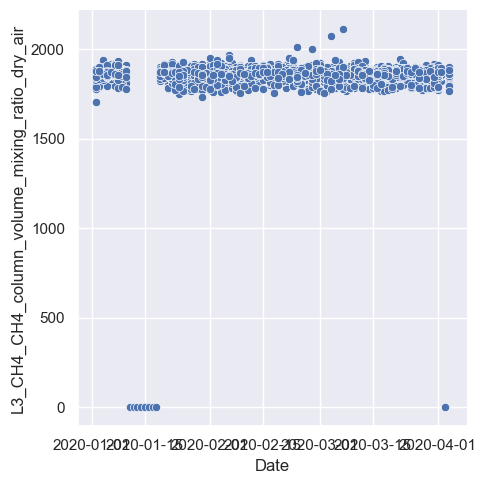

In [99]:
fig = sns.relplot(data = df_2, x = "Date", y = "L3_CH4_CH4_column_volume_mixing_ratio_dry_air")

### CH4
- Missing Data for a certain date range
- probably meaningless zeros